<a href="https://colab.research.google.com/github/dcpatton/GenerativeAI/blob/main/DLA_LlamaIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieval Augmented Generation (RAG)
---



Retrieval Augmented Generation (RAG) is a technique that enhances the accuracy and reliability of generative AI models by incorporating information retrieved from external sources. It addresses the limitations of traditional Large Language Models (LLMs), which can sometimes generate factually incorrect or misleading information.

**How RAG works**:

1. **Indexing**: The relevant data is transformed into embeddings, numerical representations that capture the semantic meaning of the text.


2. **Retrieval**: When a user query is received, the system retrieves the most relevant documents from the indexed data using a similarity search algorithm.

3. **Augmentation**: The retrieved information is integrated into the original query, creating a new prompt for the LLM. This prompt incorporates the relevant context and factual information.

4. **Generation**: The LLM processes the augmented prompt and generates a more accurate and informative response.

**Benefits of RAG**:

* **Improved accuracy**: By grounding the LLM's responses in factual information, RAG helps to reduce the risk of hallucinations and generate more reliable outputs.

* **Enhanced relevance**: RAG allows the LLM to tailor its responses to the specific context of the user's query, leading to more relevant and helpful answers.

* **Up-to-date information**: RAG enables the LLM to access and incorporate the latest information from external sources, ensuring that its responses are always current.

* **Domain-specific knowledge**: RAG can be used to provide LLMs with access to specialized knowledge bases, allowing them to generate more accurate and informative responses in specific domains.

---

https://docs.llamaindex.ai

**LlamaIndex**, formerly known as GPT Index, is a data framework designed to facilitate the connection between large language models (LLMs) and external data sources. It provides tools to index various data types, such as documents, databases, and APIs, enabling LLMs to interact with and retrieve information from these sources more effectively. The framework supports the creation of indices that can be queried by LLMs, enhancing their ability to access and utilize external data in a structured manner. This capability is particularly useful for applications requiring the integration of LLMs with specific datasets or knowledge bases.

In [ ]:
!pip install llama-index==0.11.18 -q
!pip install chromadb==0.5.13 -q
!pip install llama_index.vector_stores.chroma==0.2.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 603.0/603.0 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.1 MB/s eta 0:00:00

In [ ]:
from llama_index.core.evaluation import FaithfulnessEvaluator, AnswerRelevancyEvaluator, ContextRelevancyEvaluator

In [ ]:
# setup OpenAI api_key
import os
import getpass

if not os.environ.get('OPENAI_API_KEY'):
  os.environ['OPENAI_API_KEY'] = getpass.getpass("Enter the OpenAI API Key(which starts with sk-): ")
# print(os.environ.get('OPENAI_API_KEY'))

Enter the OpenAI API Key(which starts with sk-): ··········


In [ ]:
from llama_index.core import Settings
from llama_index.llms.openai import OpenAI

In [ ]:
Settings.llm = OpenAI(temperature=0.1, model="gpt-3.5-turbo")

In [ ]:
# https://pypi.org/project/nest-asyncio/
import nest_asyncio
nest_asyncio.apply()

## Get some data

https://docs.llamaindex.ai/en/stable/module_guides/deploying/query_engine/modules/

documents, databases, pandas, etc.

In [ ]:
# upload the pdf file (https://www.usda.gov/oce/commodity/wasde/wasde1024.pdf)
!wget https://www.usda.gov/oce/commodity/wasde/wasde1024.pdf
# from google.colab import files
# uploaded = files.upload()
# path_to_file = '/content/' + list(uploaded.keys())[0]
# print(path_to_file)
path_to_file = '/content/wasde1024.pdf'

--2024-12-01 20:58:56--  https://www.usda.gov/oce/commodity/wasde/wasde1024.pdf
Resolving www.usda.gov (www.usda.gov)... 23.218.64.116, 2a02:26f0:1180:19e::500, 2a02:26f0:1180:193::500
Connecting to www.usda.gov (www.usda.gov)|23.218.64.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 851387 (831K) [application/pdf]
Saving to: ‘wasde1024.pdf’

wasde1024.pdf       100%[===================>] 831.43K  --.-KB/s    in 0.03s   

2024-12-01 20:58:57 (27.8 MB/s) - ‘wasde1024.pdf’ saved [851387/851387]



### Indexing

Next, we want to turn our document(s) into vectors (embeddings) and it will be nice to not have to do this repeatedly in the future.LlamaIndex offers multiple integration points with vector stores / vector databases:

1. LlamaIndex can use a vector store itself as an index. Like any other index, this index can store documents and be used to answer queries.

2. LlamaIndex can load data from vector stores, similar to any other data connector. This data can then be used within LlamaIndex data structures.

https://docs.llamaindex.ai/en/stable/community/integrations/vector_stores/

* Alibaba Cloud OpenSearch (AlibabaCloudOpenSearchStore)
* Amazon Neptune - Neptune Analytics (NeptuneAnalyticsVectorStore)
* Apache Cassandra® and Astra DB through CQL (CassandraVectorStore)
* Astra DB (AstraDBVectorStore)
* AWS Document DB (AWSDocDbVectorStore)
* Azure AI Search (AzureAISearchVectorStore)
* Chroma (ChromaVectorStore)
* ClickHouse (ClickHouseVectorStore)
* Couchbase (CouchbaseVectorStore)
* DashVector (DashVectorStore)
* DeepLake (DeepLakeVectorStore)
* DocArray (DocArrayHnswVectorStore, DocArrayInMemoryVectorStore)
* Elasticsearch (ElasticsearchStore)
* Epsilla (EpsillaVectorStore)
* Faiss (FaissVectorStore)
* Hnswlib (HnswlibVectorStore)
* txtai (TxtaiVectorStore)
* Jaguar (JaguarVectorStore)
* Lantern (LanternVectorStore)
* MariaDB (MariaDBVectorStore)
* Milvus (MilvusVectorStore)
* MongoDB Atlas (MongoDBAtlasVectorSearch)
* MyScale (MyScaleVectorStore)
* Neo4j (Neo4jVectorIndex)
* OceanBase (OceanBaseVectorStore)
* Pinecone (PineconeVectorStore)
* Qdrant (QdrantVectorStore)
* LanceDB (LanceDBVectorStore)
* Redis (RedisVectorStore)
* Relyt (RelytVectorStore)
* Supabase (SupabaseVectorStore)
* Tablestore (Tablestore)
* TiDB (TiDBVectorStore)
* TimeScale (TimescaleVectorStore)
* Upstash (UpstashVectorStore)
* Vertex AI Vector Search (VertexAIVectorStore)
* Weaviate (WeaviateVectorStore)
* Zep (ZepVectorStore)
* Zilliz (MilvusVectorStore)



We will used ChromaDB as a vector store.

Knowledge Graphs https://docs.llamaindex.ai/en/stable/module_guides/indexing/lpg_index_guide/

In [ ]:
import chromadb
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import StorageContext
db = chromadb.PersistentClient(path="/content/chroma_db")
chroma_collection = db.get_or_create_collection("wasde")
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storage_context = StorageContext.from_defaults(vector_store=vector_store)

In [ ]:
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex
# set to True the first time you run this code
ingest_docs = True
if ingest_docs:
    documents = SimpleDirectoryReader(input_files=[path_to_file]).load_data()
    index = VectorStoreIndex.from_documents(documents, storage_context=storage_context)
else:
    index = VectorStoreIndex.from_vector_store(vector_store, storage_context=storage_context)

The from_documents method above splits the documents into chunks and parses them into Node objects which are lightweight abstractions over text strings that keep track of metadata and relationships. The text strings are embedded. By default, LlamaIndex uses text-embedding-ada-002 from OpenAI.

There are many ways to control how the data is loaded and indexed. See https://docs.llamaindex.ai/en/stable/module_guides/indexing/vector_store_index/

---

### Retrieval, Augmentation, Generation

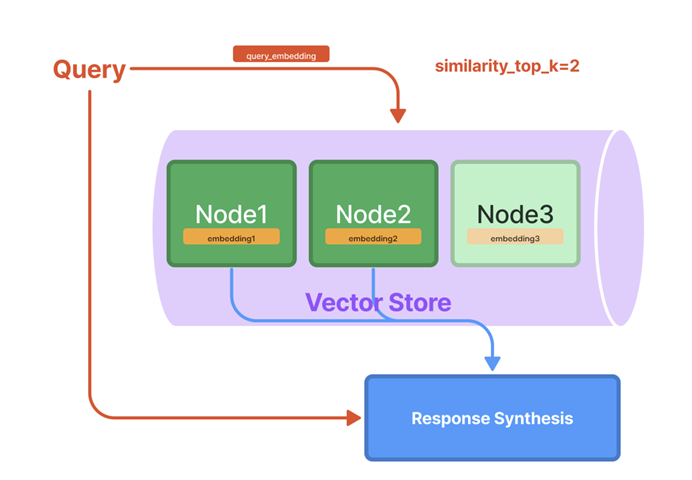

* **Retrieval** is when you find and return the most relevant documents for your query from your Index. As previously discussed in indexing, the most common type of retrieval is "top-k" semantic retrieval, but there are many other retrieval strategies.

* **Postprocessing** is when the Nodes retrieved are optionally reranked, transformed, or filtered, for instance by requiring that they have specific metadata such as keywords attached.

* **Response synthesis** is when your query, your most-relevant data and your prompt are combined and sent to your LLM to return a response.

In [ ]:
query_engine = index.as_query_engine()
query = "Why are global rice supplies raised by 5.6 million tons this month?"
response = query_engine.query(query)
print(response)

Global rice supplies are raised by 5.6 million tons this month primarily due to larger beginning stocks and increased production for India. The record output in India, reaching 142.0 million tons, is attributed to factors such as an above-average monsoon season and more rice planted at the expense of cotton.


In [ ]:
response.source_nodes

[NodeWithScore(node=TextNode(id_='21ed1451-3b12-4d5f-9d83-df05744dbedf', embedding=None, metadata={'page_label': '2', 'file_name': 'wasde1024.pdf', 'file_path': '/content/wasde1024.pdf', 'file_type': 'application/pdf', 'file_size': 851387, 'creation_date': '2024-12-01', 'last_modified_date': '2024-10-11'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='9f589ffb-a2de-407e-a071-571d75074bd6', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '2', 'file_name': 'wasde1024.pdf', 'file_path': '/content/wasde1024.pdf', 'file_type': 'application/pdf', 'file_size': 851387, 'creation_date': '2024-12-01', 'last_modified_date': '2024-10-11'}, hash='e1423120c569c3157c5a524bb7c92f7ee69d4176825779c3eccec5b512

## Evaluation

Motivation: How good is my RAG system? Do changes in indexing, retrieval, augmentation, and generation improve it?

Many evaluators available. See llamaindex docs.

Consider using more capable LLM as the judge LLM for the evaluator.

https://open.substack.com/pub/cameronrwolfe/p/finetuned-judge?r=nuti5&utm_campaign=post&utm_medium=email

In [ ]:
'''
Evaluates the relevancy of retrieved contexts to a query.
'''
context_relevancy_evaluator = ContextRelevancyEvaluator(llm=OpenAI(temperature=0, model="gpt-3.5-turbo"))
eval_result = context_relevancy_evaluator.evaluate_response(query=query, response=response)
# print(eval_result.passing)
print(eval_result.score)
print('----')
print(eval_result.feedback)

1.0
----
1. The retrieved context is relevant to the user's query as it discusses the reasons for the increase in global rice supplies by 5.6 million tons this month. The context mentions that the increase is primarily due to larger beginning stocks and production for India, where production is raised to a record 142.0 million tons. It also explains that factors such as an above-average monsoon season and more rice planted at the expense of cotton contributed to the record output.

2. The retrieved context can be used exclusively to provide a full answer to the user's query. It clearly states the reasons for the increase in global rice supplies by 5.6 million tons this month, attributing it to larger beginning stocks and production for India.

Overall, the retrieved context matches the subject matter of the user's query and can be used exclusively to provide a full answer. 

[RESULT] 4.0


In [ ]:
'''
Evaluates the relevancy of response to a query.
'''
answer_relevancy_evaluator = AnswerRelevancyEvaluator(llm=OpenAI(temperature=0, model="gpt-3.5-turbo"))
eval_result = answer_relevancy_evaluator.evaluate_response(query=query, response=response)
# print(eval_result.passing)
print(eval_result.score)
print('---')
print(eval_result.feedback)

1.0
---
1. Does the provided response match the subject matter of the user's query?
Yes, the response directly addresses why global rice supplies are raised by 5.6 million tons this month.

2. Does the provided response attempt to address the focus or perspective on the subject matter taken on by the user's query?
Yes, the response provides specific reasons for the increase in global rice supplies, focusing on larger beginning stocks and increased production in India.

[RESULT] 2


In [ ]:
'''
Evaluates whether a response is faithful to the contexts (i.e. whether the response is supported by the contexts or
hallucinated.)
'''
faithfulness_evaluator = FaithfulnessEvaluator(llm=OpenAI(temperature=0, model="gpt-3.5-turbo"))
eval_result = faithfulness_evaluator.evaluate_response(response=response)
# print(eval_result.passing)
print(eval_result.score)
print('---')
print(eval_result.feedback)

1.0
---
YES


In [ ]:
query = "Who won the 1984 World Series?"
response = query_engine.query(query)
print(response)

I do not have that information.


In [ ]:
eval_result = context_relevancy_evaluator.evaluate_response(query=query, response=response)
# print(eval_result.passing)
print(eval_result.score)
print(eval_result.feedback)

0.0
1. The retrieved context does not match the subject matter of the user's query. The context provided is related to agricultural projections and data, specifically about soybeans, cotton, and other crops. There is no mention of the 1984 World Series or any sports-related information.

2. The retrieved context cannot be used exclusively to provide a full answer to the user's query. The information provided is completely unrelated to the question about the winner of the 1984 World Series. It does not offer any relevant details or insights that could help answer the query.

[RESULT] 0.


In [ ]:
eval_result = answer_relevancy_evaluator.evaluate_response(query=query, response=response)
# print(eval_result.passing)
print(eval_result.score)
print(eval_result.feedback)

0.0
1. The response does not match the subject matter of the user's query as it does not provide any information about who won the 1984 World Series.
2. The response does not attempt to address the focus or perspective on the subject matter taken on by the user's query as it simply states that the information is not available without providing any further assistance or guidance.

[RESULT] 0


In [ ]:
eval_result = faithfulness_evaluator.evaluate_response(response=response)
# print(eval_result.passing)
print(eval_result.score)
print(eval_result.feedback)

1.0
YES


In [ ]:
query = "Is U.S. oilseed production up or down and who won the 1984 World Series?"
response = query_engine.query(query)
print(response)

U.S. oilseed production for 2024/25 is forecasted to be down. The 1984 World Series was won by the Detroit Tigers.


In [ ]:
eval_result = context_relevancy_evaluator.evaluate_response(query=query, response=response)
print(eval_result.score)
print(eval_result.feedback)

0.875
1. The retrieved context does match the subject matter of the user's query to some extent. The context discusses U.S. oilseed production for 2024/25, which is relevant to the query about U.S. oilseed production being up or down. However, the context also includes information about sugar, livestock, poultry, dairy, corn, rice, and global oilseed production, which are not directly related to the query.

2. The retrieved context can be used to provide a partial answer to the user's query. It specifically mentions that U.S. oilseed production for 2024/25 is forecasted to be down, which directly addresses the query. However, it does not provide a comprehensive answer as it does not mention whether U.S. oilseed production is up or down for the current year (2023) or provide information about who won the 1984 World Series.

[RESULT] 3.5


In [ ]:
eval_result = answer_relevancy_evaluator.evaluate_response(query=query, response=response)
print(eval_result.score)
print(eval_result.feedback)

0.5
1. The response partially matches the subject matter of the user's query. The information about U.S. oilseed production being down is relevant, but the query also asked about whether it was up or down, which is not directly addressed.
2. The response does address the second part of the query by providing the information about who won the 1984 World Series.

[RESULT] 1


In [ ]:
eval_result = faithfulness_evaluator.evaluate_response(response=response)
print(eval_result.score)
print(eval_result.feedback)

0.0
NO


In [ ]:
%%time
from llama_index.core.llama_dataset.generator import RagDatasetGenerator
# instantiate a DatasetGenerator
llm = OpenAI(model="gpt-3.5-turbo", temperature=0.0)
dataset_generator = RagDatasetGenerator.from_documents(
    documents,
    llm=llm,
    num_questions_per_chunk=1,  # set the number of questions per nodes
    show_progress=False,
)

print(len(dataset_generator.nodes))
rag_dataset = dataset_generator.generate_dataset_from_nodes()
qdf = rag_dataset.to_pandas()
print(qdf.info())

68
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   query                68 non-null     object
 1   reference_contexts   68 non-null     object
 2   reference_answer     68 non-null     object
 3   reference_answer_by  68 non-null     object
 4   query_by             68 non-null     object
dtypes: object(5)
memory usage: 2.8+ KB
None
CPU times: user 7.49 s, sys: 809 ms, total: 8.3 s
Wall time: 1min 40s


In [ ]:
import pandas as pd
pd.options.display.max_colwidth = None

qdf['query'].sample(10)

,query
18,What is the projected yield per harvested acre for U.S. soybeans in the 2024/25 marketing year according to the October 2024 WASDE report?
45,What factors may contribute to totals not adding exactly and trade not balancing in the data presented in the document?
57,"What are the projected poultry production numbers for October 2025, and how do they compare to the numbers for September 2025?"
29,"What is the estimated ending stocks for world coarse grain supply in 2023/24, and how does it compare to the beginning stocks for the same period?"
25,"Explain the differences in world imports and exports that may cause discrepancies in trade balances, as mentioned in the context information."
49,"Why may world imports and exports not balance according to the information provided, and how does this affect the equality of world supply and use?"
46,"Calculate the total world soybean exports for the 2022/23 marketing year, excluding China."
53,Explain the factors that may cause world imports and exports of a certain product to not balance according to the information provided in the document.
37,"Question: What are the major exporters and major importers of rice in the world, and what are the key statistics for each country listed in the World Rice Supply and Use table for the 2022/23 period?"
28,Why may world imports and exports not balance according to the information provided in the document?


In [ ]:
faithfulness_scores = []
answer_relevancy_scores = []
context_relevancy_scores = []
for query in qdf['query'].values:
    # print('query = ' + query)
    response = query_engine.query(query)
    # print('response = ' + str(response))
    eval_result = faithfulness_evaluator.evaluate_response(response=response)
    faithfulness_scores.append(eval_result.score)
    eval_result = answer_relevancy_evaluator.evaluate_response(query=query, response=response)
    answer_relevancy_scores.append(eval_result.score)
    eval_result = context_relevancy_evaluator.evaluate_response(query=query, response=response)
    context_relevancy_scores.append(eval_result.score)

In [ ]:
results = pd.DataFrame(columns=['experiment', 'context_relevancy', 'answer_relevancy', 'faithfulness'])

In [ ]:
import numpy as np
avg_context_relevancy = np.mean(context_relevancy_scores)
avg_answer_relevancy = np.mean(answer_relevancy_scores)
avg_faithfulness = np.mean(faithfulness_scores)
print('Average context_relevancy score = ' + str(avg_context_relevancy))
print('Average answer_relevancy score = ' + str(avg_answer_relevancy))
print('Average faithfulness score = ' + str(avg_faithfulness))
new_row = {'experiment': 'simple', 'context_relevancy': avg_context_relevancy, 'answer_relevancy': avg_answer_relevancy, 'faithfulness': avg_faithfulness}
results.loc[results.shape[0]] = new_row


Average context_relevancy score = 0.8345588235294118
Average answer_relevancy score = 0.9485294117647058
Average faithfulness score = 0.8382352941176471


## A more advanced approach

Instead of using the top 2 nodes we will use the top 5 nodes of the vector index.

In [ ]:
from llama_index.core import get_response_synthesizer
from llama_index.core.retrievers import VectorIndexRetriever
retriever = VectorIndexRetriever(
    index=index,
    similarity_top_k=5,
)
# compact (concatenate) the chunks beforehand, resulting in less LLM calls.
response_synthesizer = get_response_synthesizer(response_mode='compact') #default

In [ ]:
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core.postprocessor import SimilarityPostprocessor
query_engine = RetrieverQueryEngine(
    retriever=retriever,
    response_synthesizer=response_synthesizer,
    # Used to remove nodes that are below a similarity score threshold. https://docs.llamaindex.ai/en/stable/module_guides/querying/node_postprocessors/node_postprocessors/
    node_postprocessors=[SimilarityPostprocessor(similarity_cutoff=0.5)],
)

In [ ]:
faithfulness_scores = []
answer_relevancy_scores = []
context_relevancy_scores = []
for query in qdf['query'].values:
    response = query_engine.query(query)
    eval_result = faithfulness_evaluator.evaluate_response(response=response)
    faithfulness_scores.append(eval_result.score)
    eval_result = answer_relevancy_evaluator.evaluate_response(query=query, response=response)
    answer_relevancy_scores.append(eval_result.score)
    eval_result = context_relevancy_evaluator.evaluate_response(query=query, response=response)
    context_relevancy_scores.append(eval_result.score)

In [ ]:
avg_context_relevancy = np.mean(context_relevancy_scores)
avg_answer_relevancy = np.mean(answer_relevancy_scores)
avg_faithfulness = np.mean(faithfulness_scores)
print('Average context_relevancy score = ' + str(avg_context_relevancy))
print('Average answer_relevancy score = ' + str(avg_answer_relevancy))
print('Average faithfulness score = ' + str(avg_faithfulness))
new_row = {'experiment': 'advanced', 'context_relevancy': avg_context_relevancy, 'answer_relevancy': avg_answer_relevancy, 'faithfulness': avg_faithfulness}
results.loc[results.shape[0]] = new_row

Average context_relevancy score = 0.8621323529411765
Average answer_relevancy score = 0.9779411764705882
Average faithfulness score = 0.8823529411764706


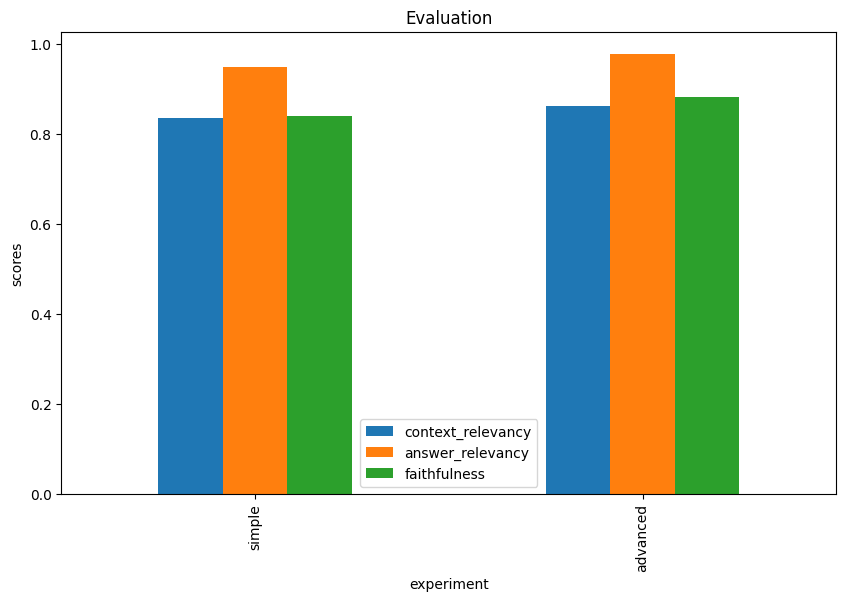

In [ ]:
import matplotlib.pyplot as plt
results.plot(x='experiment', kind='bar', figsize=(10, 6))
plt.title('Evaluation')
plt.xlabel('experiment')
plt.ylabel('scores')
plt.show()

## High Temp LLM

In [ ]:
llm = OpenAI(model="gpt-3.5-turbo", temperature=0.5)

# response_synthesizer = get_response_synthesizer(llm=llm)
# query_engine = RetrieverQueryEngine(
#     retriever=retriever,
#     response_synthesizer=response_synthesizer,
#     # node_postprocessors=[SimilarityPostprocessor(similarity_cutoff=0.5)],
# )

query_engine = index.as_query_engine(llm=llm)

In [ ]:
faithfulness_scores = []
answer_relevancy_scores = []
context_relevancy_scores = []
for query in qdf['query'].values:
    response = query_engine.query(query)
    eval_result = faithfulness_evaluator.evaluate_response(response=response)
    faithfulness_scores.append(eval_result.score)
    eval_result = answer_relevancy_evaluator.evaluate_response(query=query, response=response)
    answer_relevancy_scores.append(eval_result.score)
    eval_result = context_relevancy_evaluator.evaluate_response(query=query, response=response)
    context_relevancy_scores.append(eval_result.score)

In [ ]:
avg_context_relevancy = np.mean(context_relevancy_scores)
avg_answer_relevancy = np.mean(answer_relevancy_scores)
avg_faithfulness = np.mean(faithfulness_scores)
print('Average context_relevancy score = ' + str(avg_context_relevancy))
print('Average answer_relevancy score = ' + str(avg_answer_relevancy))
print('Average faithfulness score = ' + str(avg_faithfulness))
new_row = {'experiment': 'high_temp', 'context_relevancy': avg_context_relevancy, 'answer_relevancy': avg_answer_relevancy, 'faithfulness': avg_faithfulness}
results.loc[results.shape[0]] = new_row

Average context_relevancy score = 0.8198529411764706
Average answer_relevancy score = 0.9411764705882353
Average faithfulness score = 0.8970588235294118


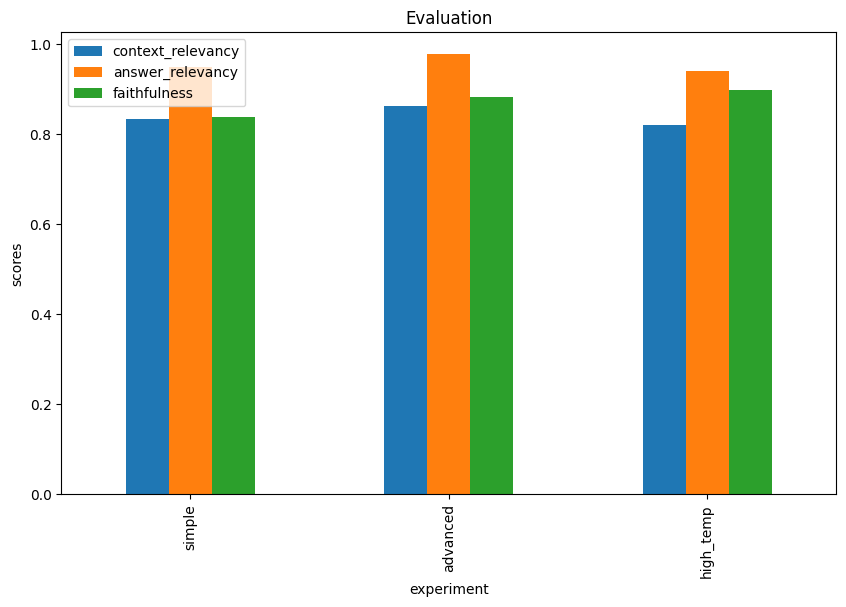

In [ ]:
results.plot(x='experiment', kind='bar', figsize=(10, 6))
plt.title('Evaluation')
plt.xlabel('experiment')
plt.ylabel('scores')
plt.show()

## Auto Merging Retriever

Looks at a set of leaf nodes and recursively "merges" subsets of leaf nodes that reference a parent node beyond a given threshold. This allows us to consolidate potentially disparate, smaller contexts into a larger context that might help synthesis.

In [ ]:
# first we need to process our documents into nodes and index those nodes.
from llama_index.core.node_parser import HierarchicalNodeParser, get_leaf_nodes
from llama_index.core.storage.docstore import SimpleDocumentStore

node_parser = HierarchicalNodeParser.from_defaults()
nodes = node_parser.get_nodes_from_documents(documents)
leaf_nodes = get_leaf_nodes(nodes)

docstore = SimpleDocumentStore()
docstore.add_documents(nodes)
storage_context = StorageContext.from_defaults(docstore=docstore)

base_index = VectorStoreIndex(
    leaf_nodes,
    storage_context=storage_context,
)

In [ ]:
from llama_index.core.retrievers import AutoMergingRetriever
base_retriever = base_index.as_retriever(similarity_top_k=6)
retriever = AutoMergingRetriever(base_retriever, storage_context, verbose=False)

llm = OpenAI(model="gpt-3.5-turbo", temperature=0.1)
response_synthesizer = get_response_synthesizer(llm=llm)
query_engine = RetrieverQueryEngine(
    retriever=retriever,
    response_synthesizer=response_synthesizer,
    # node_postprocessors=[SimilarityPostprocessor(similarity_cutoff=0.5)],
)

In [ ]:
faithfulness_scores = []
answer_relevancy_scores = []
context_relevancy_scores = []
for query in qdf['query'].values:
    response = query_engine.query(query)
    eval_result = faithfulness_evaluator.evaluate_response(response=response)
    faithfulness_scores.append(eval_result.score)
    eval_result = answer_relevancy_evaluator.evaluate_response(query=query, response=response)
    answer_relevancy_scores.append(eval_result.score)
    eval_result = context_relevancy_evaluator.evaluate_response(query=query, response=response)
    context_relevancy_scores.append(eval_result.score)

In [ ]:
avg_context_relevancy = np.mean(context_relevancy_scores)
avg_answer_relevancy = np.mean(answer_relevancy_scores)
avg_faithfulness = np.mean(faithfulness_scores)
print('Average context_relevancy score = ' + str(avg_context_relevancy))
print('Average answer_relevancy score = ' + str(avg_answer_relevancy))
print('Average faithfulness score = ' + str(avg_faithfulness))
new_row = {'experiment': 'auto_merge', 'context_relevancy': avg_context_relevancy, 'answer_relevancy': avg_answer_relevancy, 'faithfulness': avg_faithfulness}
results.loc[results.shape[0]] = new_row

Average context_relevancy score = 0.6341911764705882
Average answer_relevancy score = 0.9117647058823529
Average faithfulness score = 0.8088235294117647


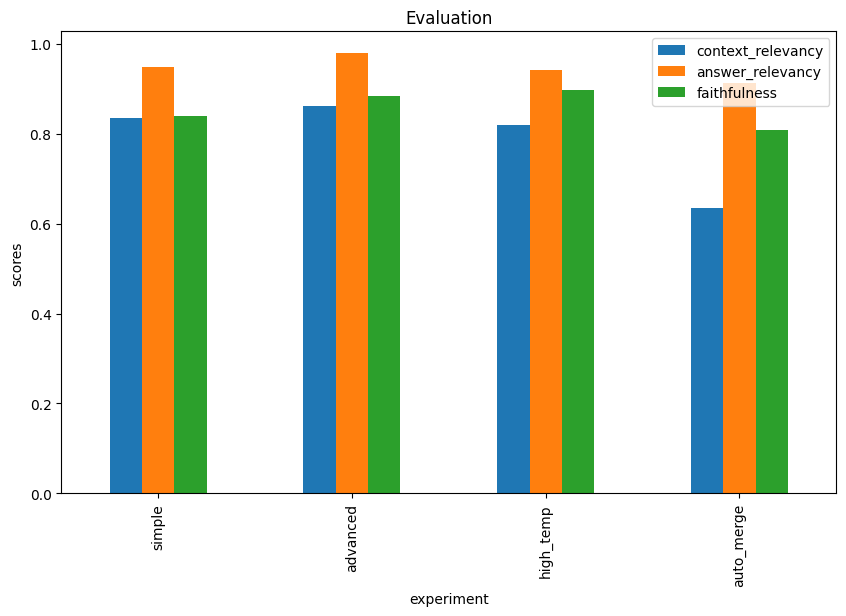

In [ ]:
results.plot(x='experiment', kind='bar', figsize=(10, 6))
plt.title('Evaluation')
plt.xlabel('experiment')
plt.ylabel('scores')
plt.show()